In [1]:
import re
import konlpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

In [2]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

In [3]:
pip install wordcloud

In [4]:
font = 'DoHyeon-Regular.ttf'

In [5]:
plt.rcParams.update( {'font.family' : 'malgun Gothic',  # 한글 폰트
                      'figure.dpi' : '120',             # 해상도
                      'figure.figsize' : [6.5, 6]})     # 가로, 세로 크기

In [6]:
from wordcloud import WordCloud

In [7]:
USB = open('2005USB.txt', encoding = 'UTF-8').read()

In [8]:
WordPunctTokenizer().tokenize(USB)

['Introduction',
 'A',
 'little',
 'under',
 'a',
 'decade',
 'ago',
 ',',
 'there',
 'was',
 'still',
 'a',
 'lot',
 'of',
 'uncertainty',
 'as',
 'to',
 'the',
 'eventual',
 'successor',
 'to',
 'the',
 'floppy',
 'drive',
 '.',
 'Iomega',
 'had',
 'tremendous',
 'success',
 'with',
 'their',
 'Zip',
 'drives',
 ',',
 'and',
 'the',
 'failed',
 'LS',
 '-',
 '120',
 'standard',
 'offered',
 'something',
 'that',
 'looked',
 'like',
 'a',
 'floppy',
 ',',
 'but',
 'was',
 'far',
 'too',
 'expensive',
 'to',
 'be',
 'a',
 'replacement',
 '.',
 'One',
 'thing',
 'was',
 'certain',
 ':',
 'the',
 'market',
 'needed',
 'a',
 'cost',
 '-',
 'effective',
 ',',
 'high',
 'capacity',
 'successor',
 'to',
 'the',
 'aging',
 '3',
 '.',
 '5',
 '"',
 'floppy',
 '.',
 'An',
 'unexpected',
 'mid',
 '-',
 'term',
 'successor',
 'came',
 'with',
 'the',
 'blank',
 'CD',
 '-',
 'R',
 '.',
 'With',
 'discs',
 'falling',
 'well',
 'below',
 '$',
 '1',
 'per',
 'CD',
 '-',
 'R',
 ',',
 'many',
 'turned',


In [9]:
USB

'Introduction\n\nA little under a decade ago, there was still a lot of uncertainty as to the eventual successor to the floppy drive. Iomega had tremendous success with their Zip drives, and the failed LS-120 standard offered something that looked like a floppy, but was far too expensive to be a replacement. One thing was certain: the market needed a cost-effective, high capacity successor to the aging 3.5" floppy.\n\nAn unexpected mid-term successor came with the blank CD-R. With discs falling well below $1 per CD-R, many turned effectively to disposable CDs as their floppy replacements. Although CD-Rs offered the increased capacity over floppies while maintaining a very low cost, they lacked the flexibility in that they could only be written to once.\n\nFast forward to today, and it\'s clear that the floppy is now dead. Except for loading storage drivers during Windows setup (which can still be accomplished in other non-floppy methods), the floppy drive is no longer necessary. Home ne

In [10]:
nouns = WordPunctTokenizer().tokenize(USB)
nouns[0:30]

['Introduction',
 'A',
 'little',
 'under',
 'a',
 'decade',
 'ago',
 ',',
 'there',
 'was',
 'still',
 'a',
 'lot',
 'of',
 'uncertainty',
 'as',
 'to',
 'the',
 'eventual',
 'successor',
 'to',
 'the',
 'floppy',
 'drive',
 '.',
 'Iomega',
 'had',
 'tremendous',
 'success',
 'with']

In [11]:
USB_word = pd.DataFrame({'word' : nouns})
USB_word = USB_word.groupby('word', as_index=False) \
                .agg(n = ('word', 'count')) \
                .sort_values('n', ascending=False)

In [12]:
nouns2 = WordPunctTokenizer().tokenize(USB)
UBF = pd.DataFrame({'word': nouns2})
UBF1=UBF.assign(word_count = UBF['word'].str.len())\
    .query("word_count >=3")\
        .groupby('word', as_index=False )\
            .agg(횟수 = ('word', 'count'))\
                .sort_values('횟수', ascending=False)\
                    .head(10)

In [13]:
USBTOP = UBF1.head(20)
USBTOP

,word,횟수
442,the,73
219,flash,47
89,and,30
185,drives,29
183,drive,22
59,USB,21
223,for,21
441,that,20
356,performance,14
94,are,13


<Axes: xlabel='횟수', ylabel='word'>

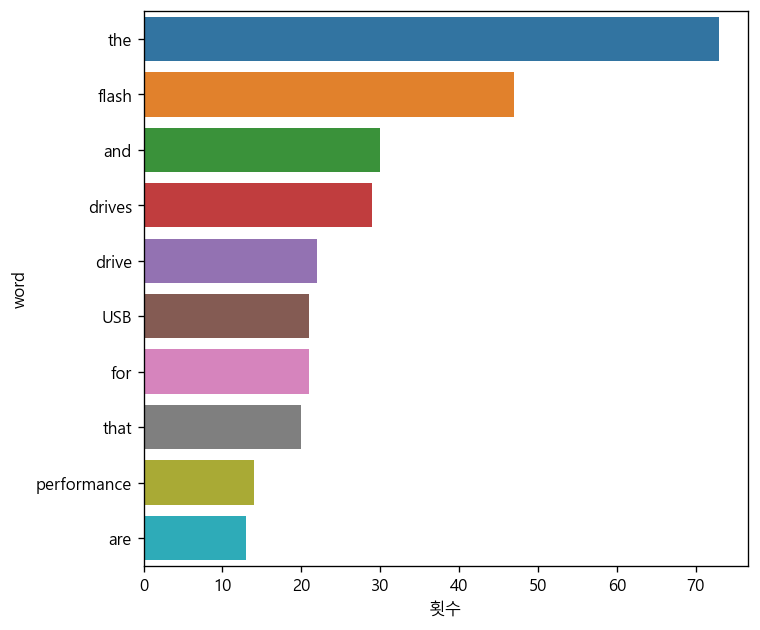

In [14]:
sns.barplot(data=USBTOP, y='word', x='횟수', hue='word')

In [15]:
USBTOP.head(20)

,word,횟수
442,the,73
219,flash,47
89,and,30
185,drives,29
183,drive,22
59,USB,21
223,for,21
441,that,20
356,performance,14
94,are,13


In [16]:
USBword = USB_word.set_index('word').to_dict()['n']

In [17]:
USB_word['word_n'] = USB_word['word'].str.len()

In [18]:
USB_word = USB_word.query('word_n >= 3')
USB_word.sort_values('word')

,word,n,word_n
13,110,1,3
14,120,1,3
16,1GB,2,3
18,2112,2,4
19,2GB,2,3
...,...,...,...
555,writes,1,6
556,written,2,7
557,yet,1,3
558,you,8,3


In [19]:
USB_word = USB_word.groupby('word', as_index=False) \
                .agg(n = ('word', 'count')) \
                .sort_values('n', ascending=False)

In [20]:
USBword = USB_word.set_index('word').to_dict()['n']

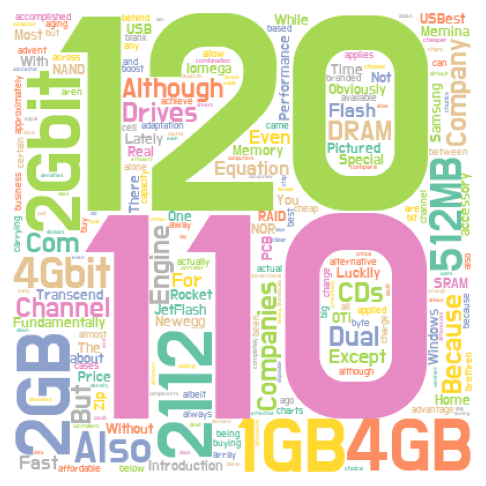

In [21]:
# wc 만들기
wc = WordCloud(random_state = 710,         # 난수 고정, 항상 같은 모양으로 생성
                font_path = font,           # 폰트 설정
                width = 400,                # 가로 크기
                height = 400,               # 세로 크기
                background_color = 'white',
                colormap = 'Set2',) # 배경색

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(USBword)

# 워드 클라우드 출력하기
# 자주 사용한 단어는 크게 표시됨
plt.figure(figsize = (5, 5))            # 액자 사이즈
plt.axis('off')                         # 테두리 선 없애기
plt.imshow(img_wordcloud)

In [22]:
# 구름 이미지 불러오기
# 구름 모양의 이미지 경계가 뚜렸한 png 파일
# 마스크가 될 이미지 파일 불러오기
  
icon = PIL.Image.open('STICK.png')   

In [23]:
print(f'이미지 파일 이름 : {icon.filename}')
print(f'이미지 파일 형식 : {icon.format}')
print(f'이미지 파일 크기 : {icon.size}')
print(f'이미지 색상 모드 : {icon.mode}')
print(f'이미지 가로 크기 : {icon.width}')
print(f'이미지 세로 크기 : {icon.height}')

이미지 파일 이름 : STICK.png
이미지 파일 형식 : PNG
이미지 파일 크기 : (1024, 1024)
이미지 색상 모드 : RGB
이미지 가로 크기 : 1024
이미지 세로 크기 : 1024


In [24]:
img = np.array(icon)

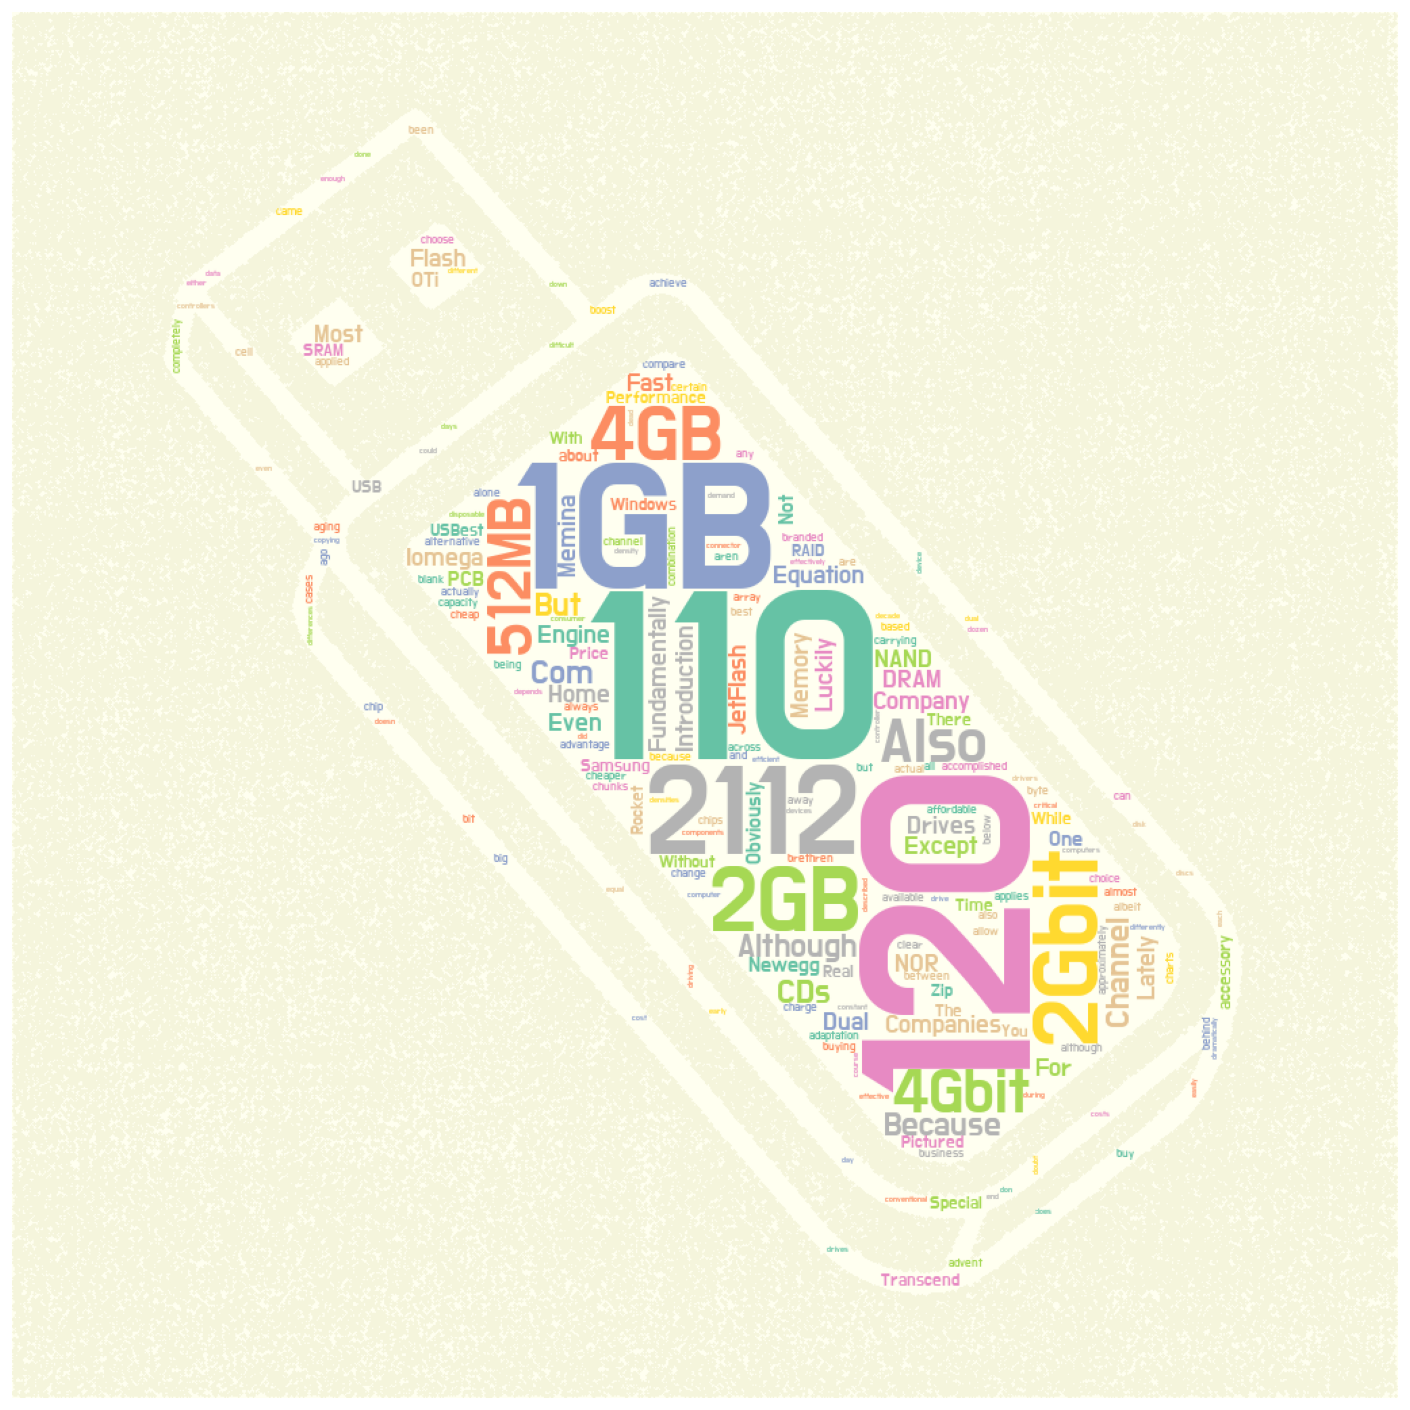

In [25]:
# wc  만들기
wc = WordCloud(random_state = 1,  
              font_path = font,
              width = 1000,
              height = 1000,
              contour_width=3 ,                 # 테두리 굵기
              contour_color='beige',        # 테두리 색
              background_color = 'ivory',
              colormap = 'Set2',
              mask = img)                     # 배경으로 사용할 이미지

type(wc) 

# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(USBword)

# 워드 클라우드 출력하기
plt.figure(figsize = (15,15))
plt.axis('off')
plt.imshow(img_wordcloud)